In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [ ]:
#importing dataset
for dirname, _,filenames in os.walk('/kaggle/input'):
  for filename in filenames:
    print(os.path.join(dirname, filename))

In [ ]:
#loading data into a dataframe
data = pd.read_csv("/content/Sloan Digital Sky Survey DR14.zip")

In [ ]:
data.head()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,1.237650e+18,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,301,4,267,3.722360e+18,STAR,-0.000009,3306,54922,491
1,1.237650e+18,183.598370,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,301,4,267,3.638140e+17,STAR,-0.000055,323,51615,541
2,1.237650e+18,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,301,4,268,3.232740e+17,GALAXY,0.123111,287,52023,513
3,1.237650e+18,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,301,4,269,3.722370e+18,STAR,-0.000111,3306,54922,510
4,1.237650e+18,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,301,4,269,3.722370e+18,STAR,0.000590,3306,54922,512


In [ ]:
data.tail()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
9995,1.237650e+18,131.316413,51.539547,18.81777,17.47053,16.91508,16.68305,16.50570,1345,301,3,161,5.033450e+17,GALAXY,0.027583,447,51877,246
9996,1.237650e+18,131.306083,51.671341,18.27255,17.43849,17.07692,16.71661,16.69897,1345,301,3,162,5.033400e+17,GALAXY,0.117772,447,51877,228
9997,1.237650e+18,131.552562,51.666986,18.75818,17.77784,17.51872,17.43302,17.42048,1345,301,3,162,8.222620e+18,STAR,-0.000402,7303,57013,622
9998,1.237650e+18,131.477151,51.753068,18.88287,17.91068,17.53152,17.36284,17.13988,1345,301,3,163,5.033400e+17,GALAXY,0.014019,447,51877,229
9999,1.237650e+18,131.665012,51.805307,19.27586,17.37829,16.30542,15.83548,15.50588,1345,301,3,163,5.033410e+17,GALAXY,0.118417,447,51877,233


In [ ]:
#displaying dimension of dataset
data.shape

(10000, 18)

Non-numeric columns: Index(['class'], dtype='object')


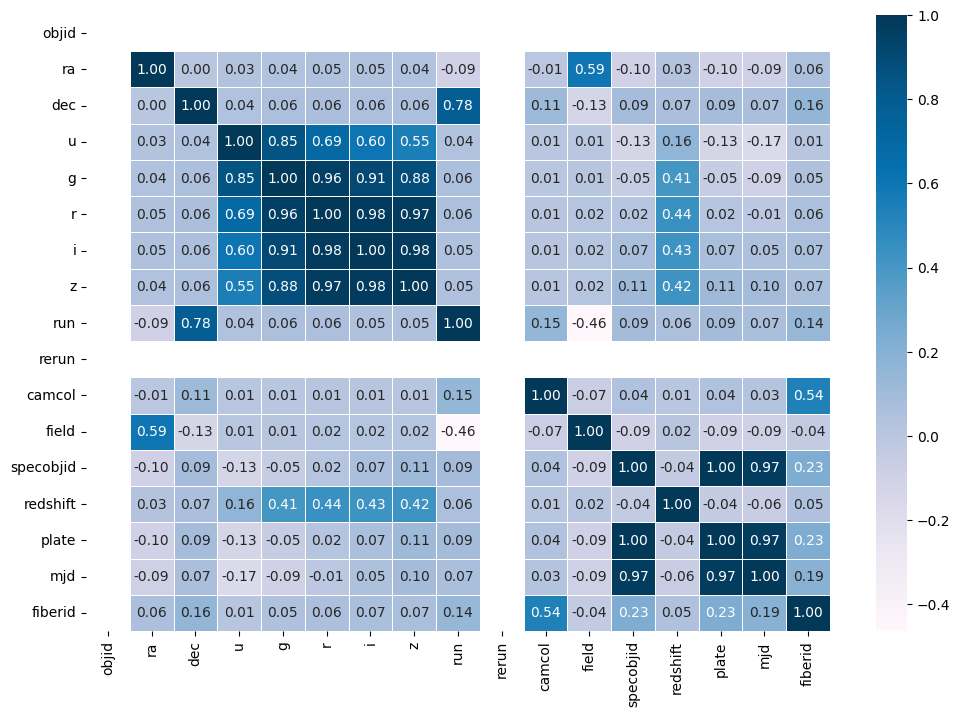

In [ ]:
non_numeric_cols = data.select_dtypes(exclude=['float64', 'int64']).columns
print("Non-numeric columns:", non_numeric_cols)
numeric_data = data.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_data.corr()
f, ax = plt.subplots(figsize=(12, 8))
sns.heatmap(correlation_matrix, cmap="PuBu", annot=True, linewidths=0.5, fmt='.2f', ax=ax)
plt.show()

In [ ]:
data.drop(['objid','specobjid'],axis=1,inplace=True)

In [ ]:
data.head(10)

,ra,dec,u,g,r,i,z,run,rerun,camcol,field,class,redshift,plate,mjd,fiberid
0,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,301,4,267,STAR,-0.000009,3306,54922,491
1,183.598370,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,301,4,267,STAR,-0.000055,323,51615,541
2,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,301,4,268,GALAXY,0.123111,287,52023,513
3,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,301,4,269,STAR,-0.000111,3306,54922,510
4,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,301,4,269,STAR,0.000590,3306,54922,512
5,183.847174,0.173694,19.43133,18.46779,18.16451,18.01475,18.04155,752,301,4,269,STAR,0.000315,324,51666,594
6,183.864379,0.019201,19.38322,17.88995,17.10537,16.66393,16.36955,752,301,4,269,GALAXY,0.100242,287,52023,559
7,183.900081,0.187473,18.97993,17.84496,17.38022,17.20673,17.07071,752,301,4,269,STAR,0.000315,3306,54922,515
8,183.924588,0.097246,17.90616,16.97172,16.67541,16.53776,16.47596,752,301,4,270,STAR,0.000089,323,51615,595
9,183.973498,0.081626,18.67249,17.71375,17.49362,17.28284,17.22644,752,301,4,270,GALAXY,0.040508,288,52000,400


In [ ]:
data.shape


(10000, 16)

In [ ]:
data.describe()

,ra,dec,u,g,r,i,z,run,rerun,camcol,field,redshift,plate,mjd,fiberid
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,175.529987,14.836148,18.619355,17.371931,16.840963,16.583579,16.422833,981.034800,301.0,3.648700,302.380100,0.143726,1460.986400,52943.533300,353.069400
std,47.783439,25.212207,0.828656,0.945457,1.067764,1.141805,1.203188,273.305024,0.0,1.666183,162.577763,0.388774,1788.778371,1511.150651,206.298149
min,8.235100,-5.382632,12.988970,12.799550,12.431600,11.947210,11.610410,308.000000,301.0,1.000000,11.000000,-0.004136,266.000000,51578.000000,1.000000
25%,157.370946,-0.539035,18.178035,16.815100,16.173333,15.853705,15.618285,752.000000,301.0,2.000000,184.000000,0.000081,301.000000,51900.000000,186.750000
50%,180.394514,0.404166,18.853095,17.495135,16.858770,16.554985,16.389945,756.000000,301.0,4.000000,299.000000,0.042591,441.000000,51997.000000,351.000000
75%,201.547279,35.649397,19.259232,18.010145,17.512675,17.258550,17.141447,1331.000000,301.0,5.000000,414.000000,0.092579,2559.000000,54468.000000,510.000000
max,260.884382,68.542265,19.599900,19.918970,24.802040,28.179630,22.833060,1412.000000,301.0,6.000000,768.000000,5.353854,8410.000000,57481.000000,1000.000000


In [ ]:
data.shape

(10000, 16)

In [ ]:
#checking null values to determine completeness of dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ra        10000 non-null  float64
 1   dec       10000 non-null  float64
 2   u         10000 non-null  float64
 3   g         10000 non-null  float64
 4   r         10000 non-null  float64
 5   i         10000 non-null  float64
 6   z         10000 non-null  float64
 7   run       10000 non-null  int64  
 8   rerun     10000 non-null  int64  
 9   camcol    10000 non-null  int64  
 10  field     10000 non-null  int64  
 11  class     10000 non-null  object 
 12  redshift  10000 non-null  float64
 13  plate     10000 non-null  int64  
 14  mjd       10000 non-null  int64  
 15  fiberid   10000 non-null  int64  
dtypes: float64(8), int64(7), object(1)
memory usage: 1.2+ MB


In [ ]:
le = LabelEncoder().fit(data['class'])
data['class'] = le.transform(data['class'])

In [ ]:
data.head(10)

,ra,dec,u,g,r,i,z,run,rerun,camcol,field,class,redshift,plate,mjd,fiberid
0,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,301,4,267,2,-0.000009,3306,54922,491
1,183.598370,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,301,4,267,2,-0.000055,323,51615,541
2,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,301,4,268,0,0.123111,287,52023,513
3,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,301,4,269,2,-0.000111,3306,54922,510
4,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,301,4,269,2,0.000590,3306,54922,512
5,183.847174,0.173694,19.43133,18.46779,18.16451,18.01475,18.04155,752,301,4,269,2,0.000315,324,51666,594
6,183.864379,0.019201,19.38322,17.88995,17.10537,16.66393,16.36955,752,301,4,269,0,0.100242,287,52023,559
7,183.900081,0.187473,18.97993,17.84496,17.38022,17.20673,17.07071,752,301,4,269,2,0.000315,3306,54922,515
8,183.924588,0.097246,17.90616,16.97172,16.67541,16.53776,16.47596,752,301,4,270,2,0.000089,323,51615,595
9,183.973498,0.081626,18.67249,17.71375,17.49362,17.28284,17.22644,752,301,4,270,0,0.040508,288,52000,400


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ra        10000 non-null  float64
 1   dec       10000 non-null  float64
 2   u         10000 non-null  float64
 3   g         10000 non-null  float64
 4   r         10000 non-null  float64
 5   i         10000 non-null  float64
 6   z         10000 non-null  float64
 7   run       10000 non-null  int64  
 8   rerun     10000 non-null  int64  
 9   camcol    10000 non-null  int64  
 10  field     10000 non-null  int64  
 11  class     10000 non-null  int64  
 12  redshift  10000 non-null  float64
 13  plate     10000 non-null  int64  
 14  mjd       10000 non-null  int64  
 15  fiberid   10000 non-null  int64  
dtypes: float64(8), int64(8)
memory usage: 1.2 MB


In [ ]:
x= data.drop('class',axis=1)
y = data['class']

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler(copy=True, with_mean=True,with_std = True)
x = scaler.fit_transform(x)

In [ ]:
#show data
x[:20]

array([[ 0.16745842, -0.58492272,  1.03148637, -0.34855938, -0.83728027,
        -0.94605772, -0.99534154, -0.83806089,  0.        ,  0.21085172,
        -0.21763043, -0.36973112,  1.03148936,  1.30931064,  0.66863177],
       [ 0.16886159, -0.58311429,  0.05243046, -0.16653251, -0.15415531,
        -0.08264457, -0.02604308, -0.83806089,  0.        ,  0.21085172,
        -0.21763043, -0.36984929, -0.63621258, -0.87919741,  0.91101156],
       [ 0.17057433, -0.58347525,  0.92156796,  0.86709322,  0.59315368,
         0.44120145,  0.31452753, -0.83806089,  0.        ,  0.21085172,
        -0.21147922, -0.05302706, -0.65633905, -0.60919097,  0.77527888],
       [ 0.17455754, -0.58650069, -1.03063038, -0.81362749, -0.63669227,
        -0.52660429, -0.43092107, -0.83806089,  0.        ,  0.21085172,
        -0.20532801, -0.36999261,  1.03148936,  1.30931064,  0.76073609],
       [ 0.17482457, -0.58441247, -1.29023238, -1.17251944, -0.37676237,
        -0.02510121,  0.15827647, -0.83806089, 

In [ ]:
data.shape

(10000, 16)

ra             Axes(0.125,0.798085;0.133621x0.0819149)
dec         Axes(0.285345,0.798085;0.133621x0.0819149)
u            Axes(0.44569,0.798085;0.133621x0.0819149)
g           Axes(0.606034,0.798085;0.133621x0.0819149)
r           Axes(0.766379,0.798085;0.133621x0.0819149)
i              Axes(0.125,0.699787;0.133621x0.0819149)
z           Axes(0.285345,0.699787;0.133621x0.0819149)
run          Axes(0.44569,0.699787;0.133621x0.0819149)
rerun       Axes(0.606034,0.699787;0.133621x0.0819149)
camcol      Axes(0.766379,0.699787;0.133621x0.0819149)
field          Axes(0.125,0.601489;0.133621x0.0819149)
class       Axes(0.285345,0.601489;0.133621x0.0819149)
redshift     Axes(0.44569,0.601489;0.133621x0.0819149)
plate       Axes(0.606034,0.601489;0.133621x0.0819149)
mjd         Axes(0.766379,0.601489;0.133621x0.0819149)
fiberid        Axes(0.125,0.503191;0.133621x0.0819149)
dtype: object

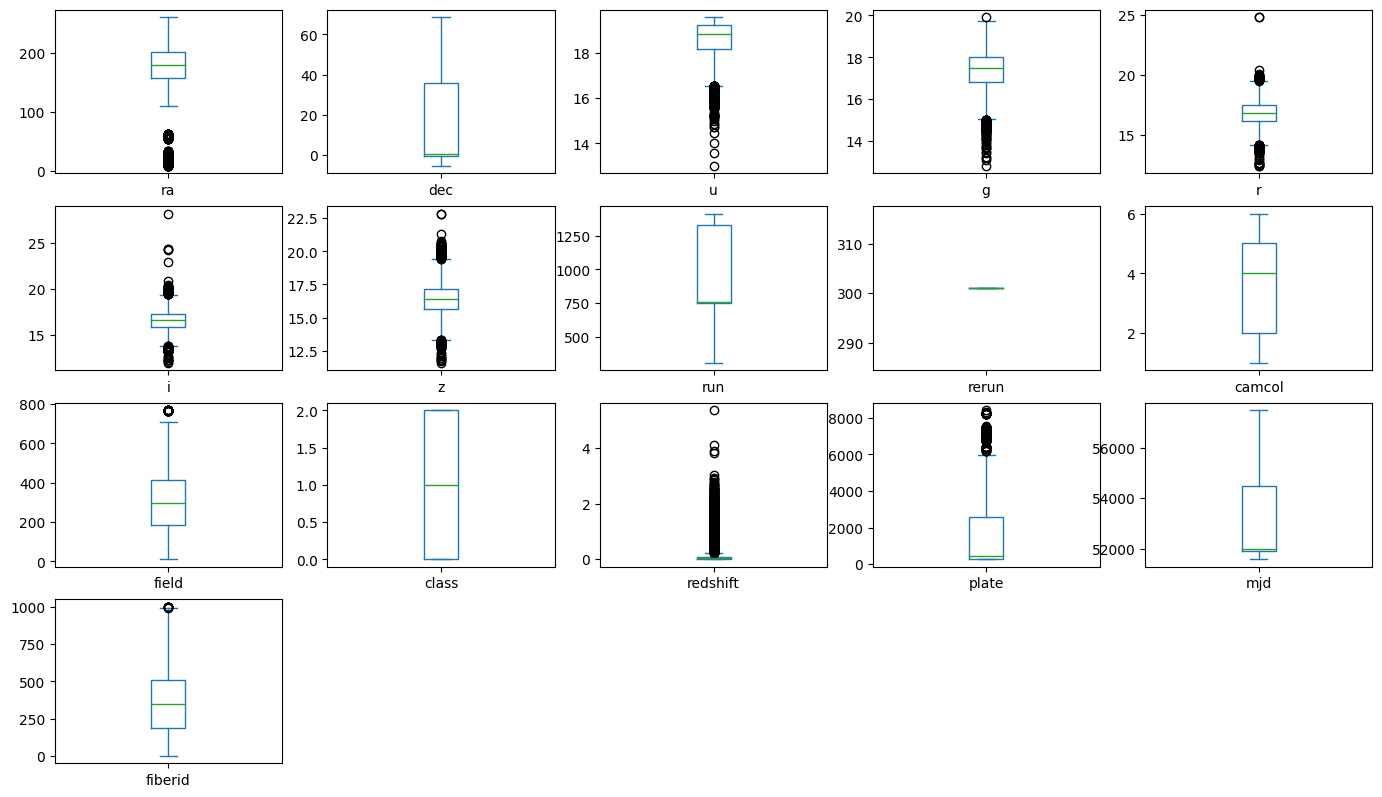

In [ ]:
data.plot(kind='box', subplots=True, layout=(8,5), figsize=(17,20))

array([[<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >]], dtype=object)

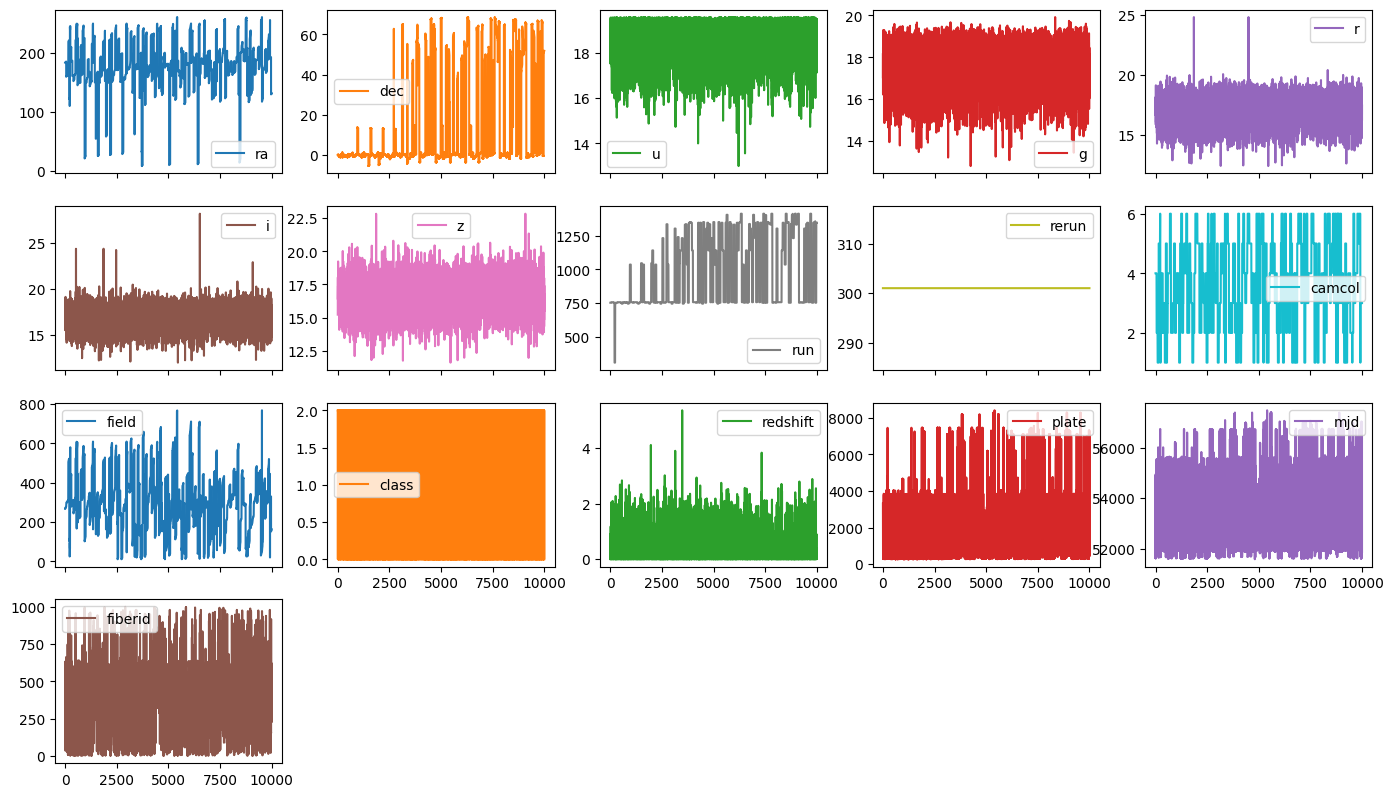

In [ ]:
data.plot(kind='line', subplots=True, layout=(8,5), figsize=(17,20))

array([[<Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>,
        <Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>,
        <Axes: ylabel='Frequency'>],
       [<Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>,
        <Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>,
        <Axes: ylabel='Frequency'>],
       [<Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>,
        <Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>,
        <Axes: ylabel='Frequency'>],
       [<Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>,
        <Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>,
        <Axes: ylabel='Frequency'>],
       [<Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>,
        <Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>,
        <Axes: ylabel='Frequency'>],
       [<Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>,
        <Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>,
        <Axes: ylabel='Frequency'>],
       [<A

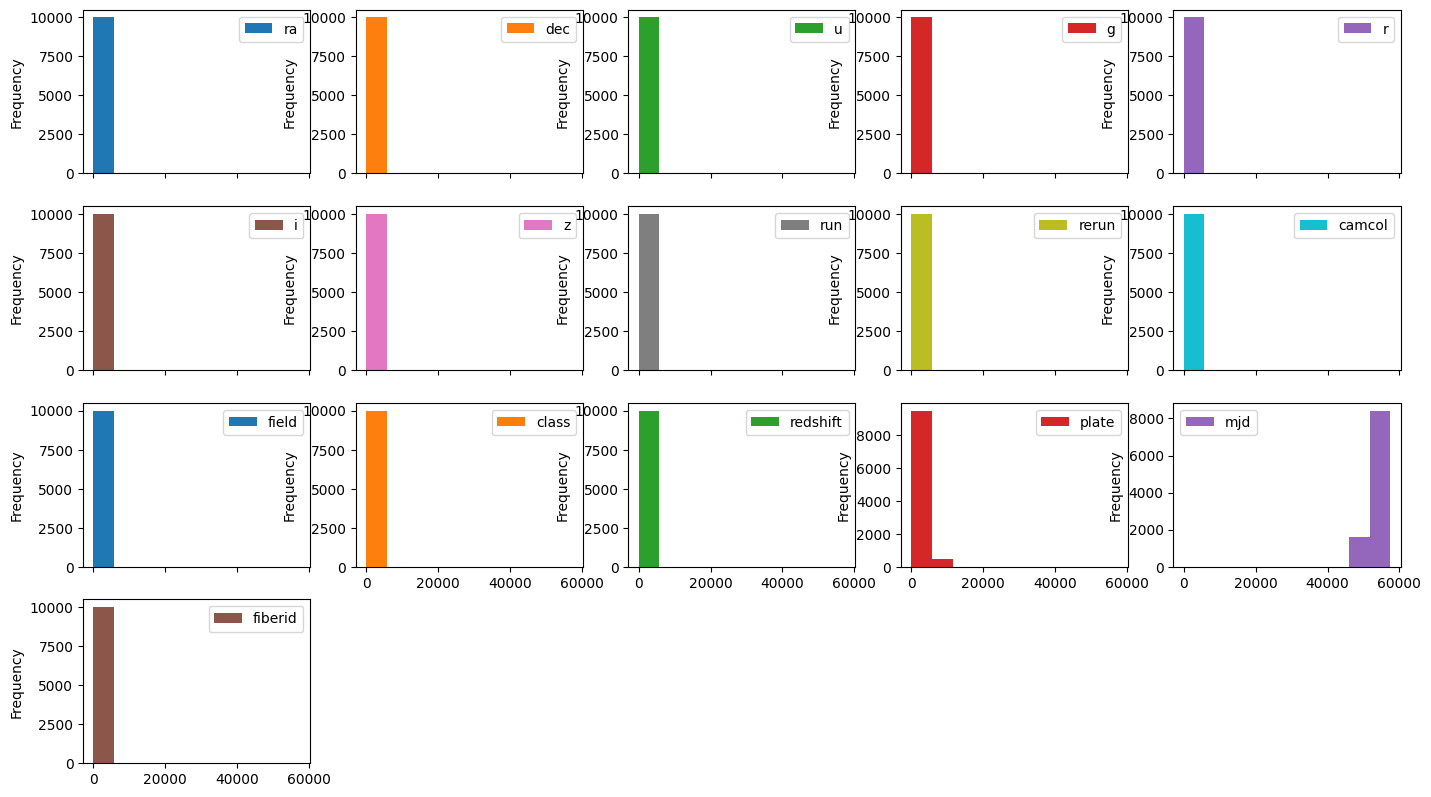

In [ ]:
data.plot(kind='hist', subplots=True, layout=(8,5), figsize=(17,20))

In [ ]:
numerical_columns = ['ra', 'dec', 'u', 'g', 'r', 'i', 'z', 'redshift']

In [ ]:
data

,ra,dec,u,g,r,i,z,run,rerun,camcol,field,class,redshift,plate,mjd,fiberid
0,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,301,4,267,2,-0.000009,3306,54922,491
1,183.598370,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,301,4,267,2,-0.000055,323,51615,541
2,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,301,4,268,0,0.123111,287,52023,513
3,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,301,4,269,2,-0.000111,3306,54922,510
4,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,301,4,269,2,0.000590,3306,54922,512
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,131.316413,51.539547,18.81777,17.47053,16.91508,16.68305,16.50570,1345,301,3,161,0,0.027583,447,51877,246
9996,131.306083,51.671341,18.27255,17.43849,17.07692,16.71661,16.69897,1345,301,3,162,0,0.117772,447,51877,228
9997,131.552562,51.666986,18.75818,17.77784,17.51872,17.43302,17.42048,1345,301,3,162,2,-0.000402,7303,57013,622
9998,131.477151,51.753068,18.88287,17.91068,17.53152,17.36284,17.13988,1345,301,3,163,0,0.014019,447,51877,229


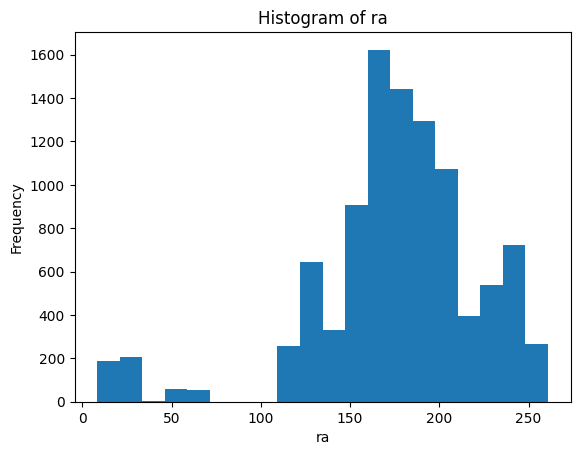

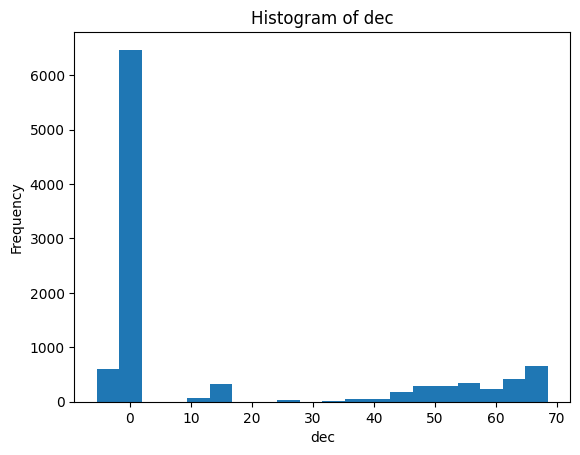

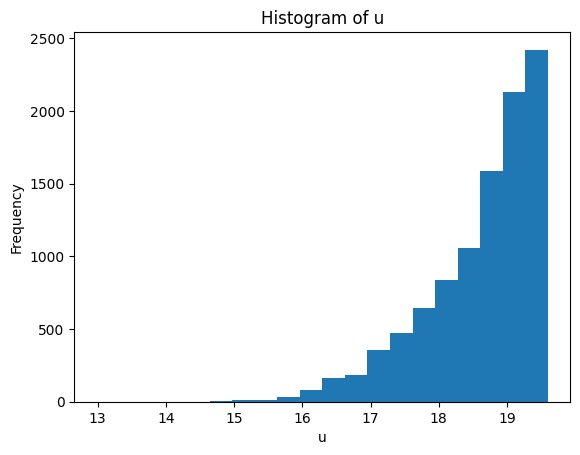

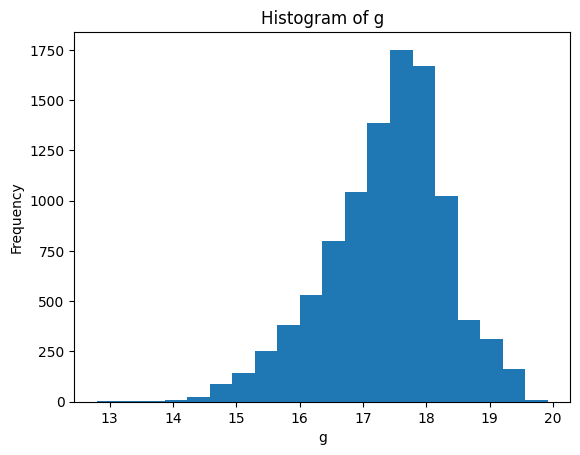

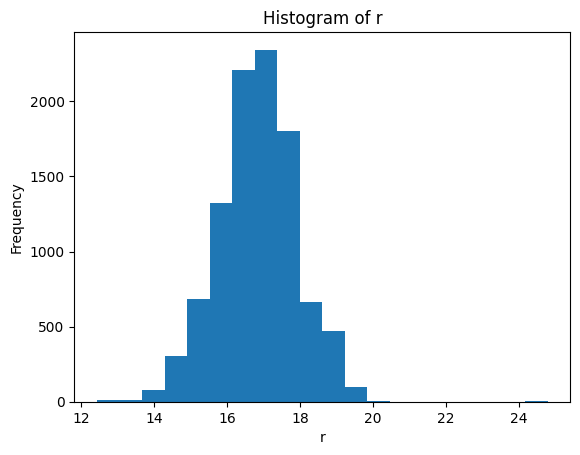

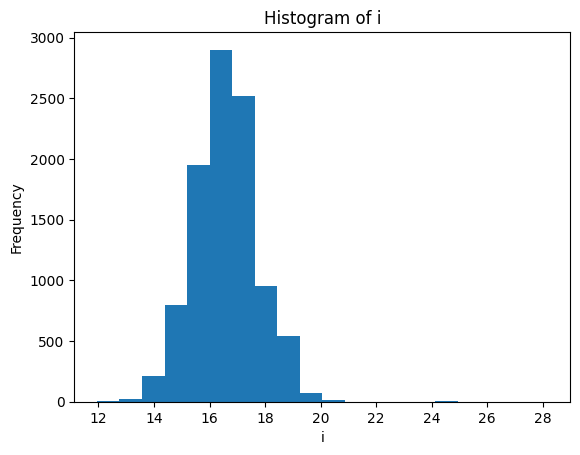

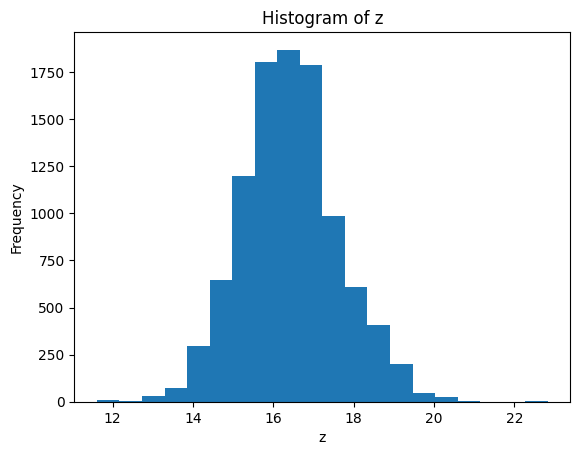

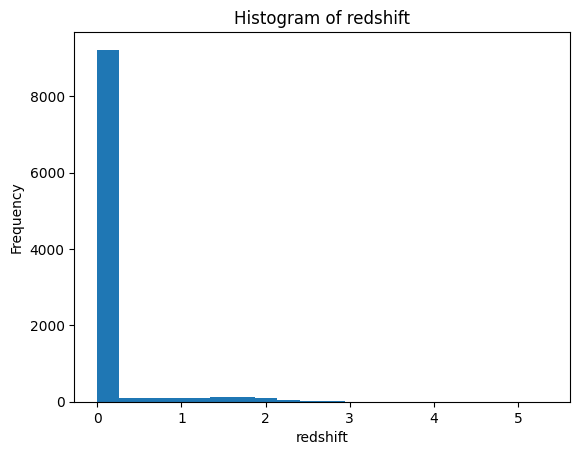

In [ ]:
for column in numerical_columns:
    # Calculate summary statistics
    column_data = data[column]
    min_val = column_data.min()
    max_val = column_data.max()
    mean_val = column_data.mean()
    median_val = column_data.median()
    std_val = column_data.std()
    plt.figure()
    plt.hist(column_data, bins=20)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()


In [ ]:
#performing the 30% test & 70% train split test
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=128)

<Axes: xlabel='class', ylabel='count'>

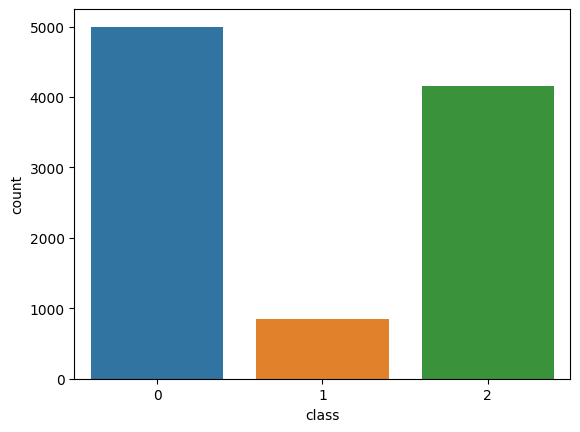

In [ ]:
#checking the no. of labels for each class of dataset where 0= gakaxy, 1= quasar, 2=star.
custom_colors = ["#1f77b4", "#ff7f0e", "#2ca02c"]
sns.countplot(x=data['class'],palette=custom_colors)

In [ ]:
data["class"].value_counts()

class
0    4998
2    4152
1     850
Name: count, dtype: int64

<Axes: >

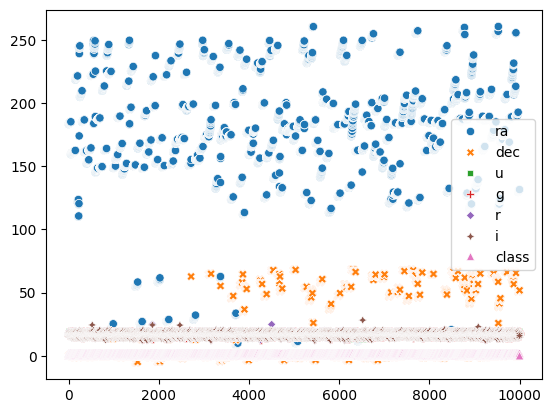

In [ ]:
sns.scatterplot(data[['ra','dec','u','g','r','i', 'class']])

<Axes: >

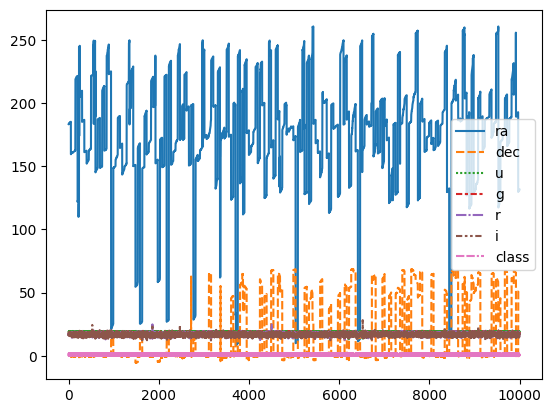

In [ ]:
sns.lineplot(data[['ra','dec','u','g','r','i', 'class']])

<Axes: >

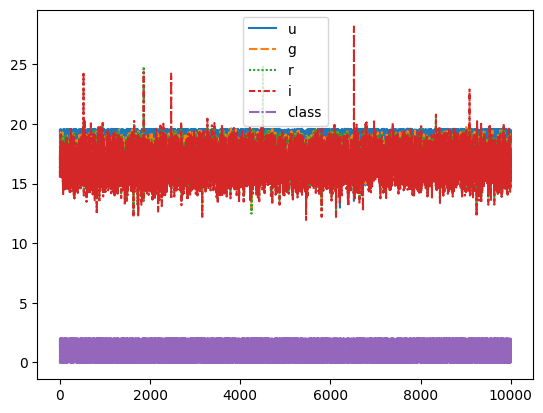

In [ ]:
sns.lineplot(data[['u','g','r','i', 'class']])

<Axes: >

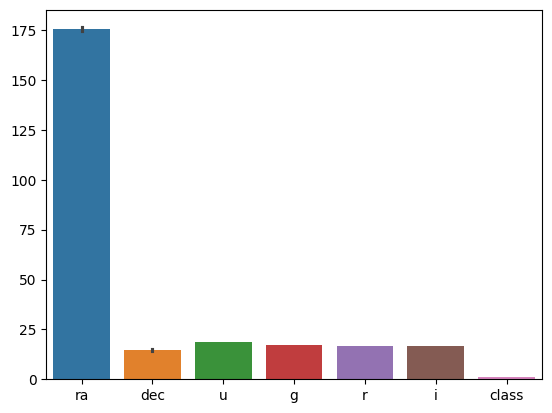

In [ ]:
sns.barplot((data[['ra','dec','u','g','r','i', 'class']]))

<Axes: >

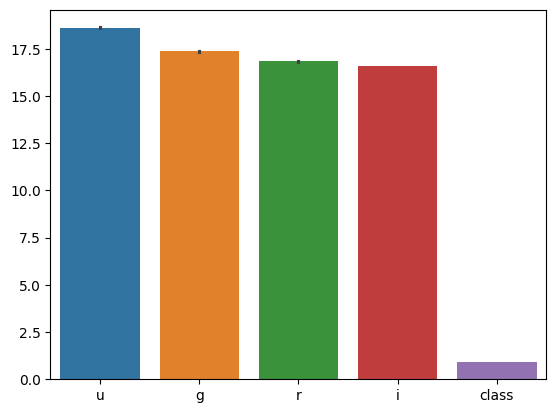

In [ ]:
sns.barplot(data[['u','g','r','i', 'class']])

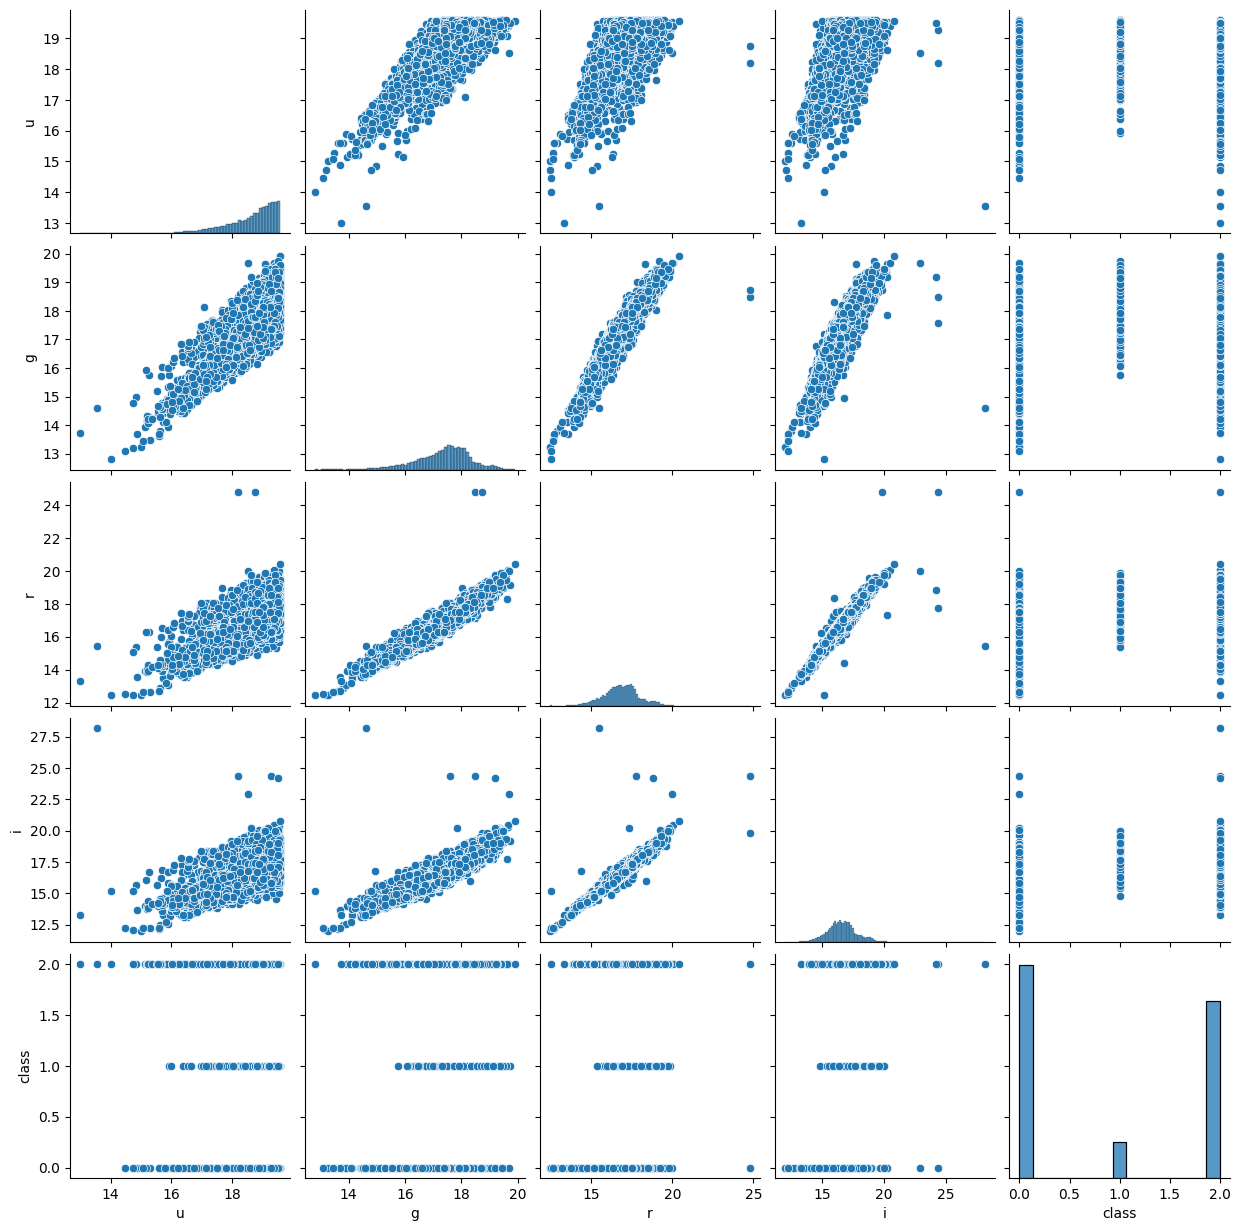

In [ ]:
sns.pairplot(data[['u','g','r','i', 'class']])

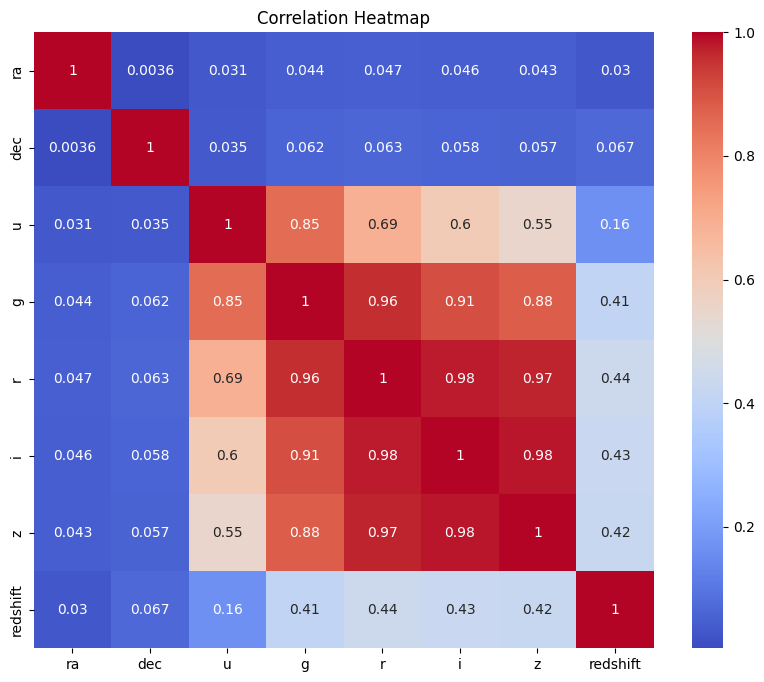

In [ ]:
correlation_matrix = data[numerical_columns].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
dtClassifier = DecisionTreeClassifier(max_leaf_nodes=15,max_depth=3)

In [ ]:
LRClassifier = LogisticRegression()

In [ ]:
NeNeClassifer = KNeighborsClassifier(n_neighbors=3)

In [ ]:
svm_classifier = SVC()


In [ ]:
dtClassifier.fit(x_train,y_train)
LRClassifier.fit(x_train,y_train)
NeNeClassifer.fit(x_train,y_train)
svm_classifier.fit(x_train,y_train)

SVC()

In [ ]:
#getting the prediction set ofthe models
y_preds = dtClassifier.predict(x_test)
y_predsLR = LRClassifier.predict(x_test)
y_predsNeNe = NeNeClassifer.predict(x_test)
y_predsvm = svm_classifier.predict(x_test)

In [ ]:
models = {
    KNeighborsClassifier(n_neighbors=3):'K-Neighbors Classifier',
    LogisticRegression(max_iter=1000):'Logistic Regression',
    DecisionTreeClassifier():'Decision Tree Classifier',
    SVC(): 'Support Vector Machine'}

In [ ]:
#displaying last 10 predictions on the test split as output by all the models
print(y_preds[:10],'\n',y_test[:10])
print("\n***********************************************")
print(y_predsLR[:10],'\n',y_test[:10])
print("\n***********************************************")
print(y_predsNeNe[:10],'\n',y_test[:10])
print("\n***********************************************")
print(y_predsvm[:10],'\n',y_test[:10])

[2 0 2 2 0 0 2 1 0 0] 
 7054    2
4692    0
907     2
4498    2
9957    0
3341    0
7152    2
1152    1
7105    0
2066    0
Name: class, dtype: int64

***********************************************
[2 0 2 2 0 0 2 1 0 0] 
 7054    2
4692    0
907     2
4498    2
9957    0
3341    0
7152    2
1152    1
7105    0
2066    0
Name: class, dtype: int64

***********************************************
[2 0 2 2 0 0 2 1 0 0] 
 7054    2
4692    0
907     2
4498    2
9957    0
3341    0
7152    2
1152    1
7105    0
2066    0
Name: class, dtype: int64

***********************************************
[0 0 2 2 0 0 2 1 0 0] 
 7054    2
4692    0
907     2
4498    2
9957    0
3341    0
7152    2
1152    1
7105    0
2066    0
Name: class, dtype: int64


In [ ]:
from sklearn.metrics import classification_report
target_names = ['0','1','2']
print('\033[1m Decision Tree -\n \033[0m',classification_report(y_preds,y_test,target_names=target_names) + '\n')
print('\033[1m Linear Regression -\n \033[0m',classification_report(y_predsLR,y_test,target_names=target_names)  +'\n')
print("\033[1m KNN Classifier -\n \033[0m",classification_report(y_predsNeNe,y_test,target_names=target_names) + '\n')
print("\033[1m SVM Classifier -\n \033[0m",classification_report(y_predsvm,y_test,target_names=target_names) + '\n')

 Decision Tree -
                precision    recall  f1-score   support

           0       0.99      0.99      0.99      1504
           1       0.94      0.98      0.96       255
           2       1.00      1.00      1.00      1241

    accuracy                           0.99      3000
   macro avg       0.98      0.99      0.98      3000
weighted avg       0.99      0.99      0.99      3000


 Linear Regression -
                precision    recall  f1-score   support

           0       0.97      0.99      0.98      1469
           1       0.94      0.97      0.96       258
           2       0.99      0.96      0.98      1273

    accuracy                           0.98      3000
   macro avg       0.97      0.97      0.97      3000
weighted avg       0.98      0.98      0.98      3000


 KNN Classifier -
                precision    recall  f1-score   support

           0       0.94      0.89      0.91      1575
           1       0.88      0.97      0.92       240
           

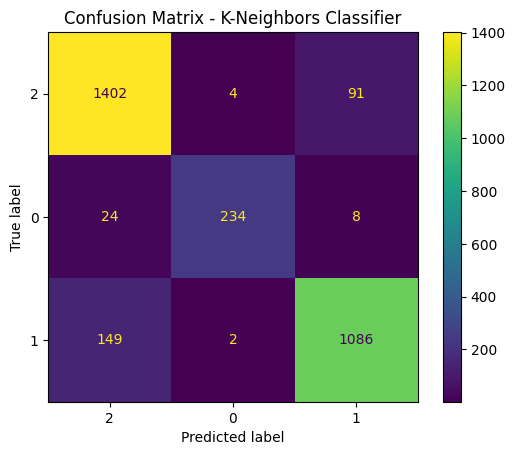

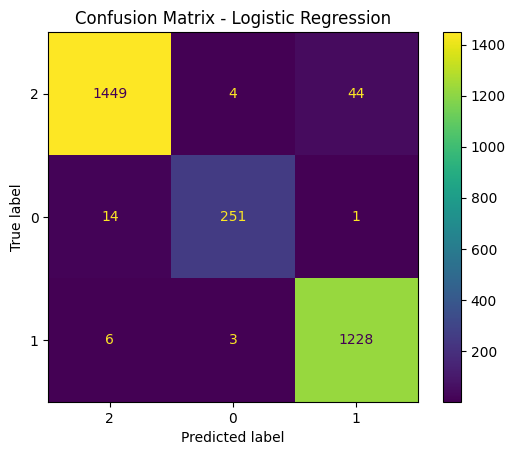

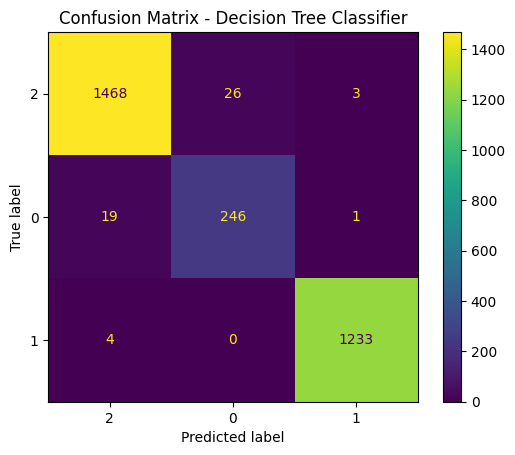

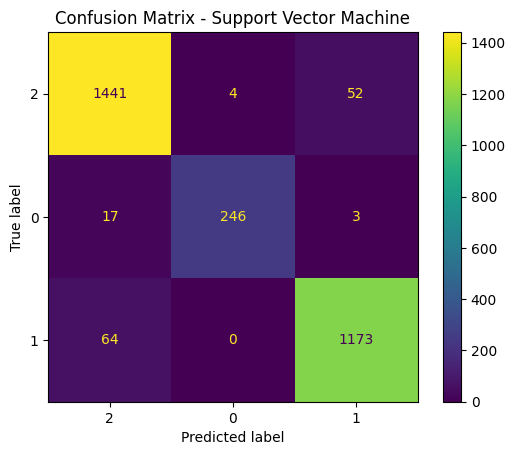

In [ ]:
import pandas as pd
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

for model, name in models.items():
    model.fit(x_train, y_train)

    y_pred = model.predict(x_test)

    labels = pd.unique(y_test)
    cm = confusion_matrix(y_test, y_pred)
    cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
    cm_display.plot()
    plt.title(f'Confusion Matrix - {name}')
    plt.show()




In [ ]:
print('\naccuracy_score by Decision Tree Classifier:', accuracy_score(y_true=y_test, y_pred=y_preds))
print('\naccuracy_score by Logistic Regression Classifier:', accuracy_score(y_true=y_test, y_pred=y_predsLR))
print('\naccuracy_score by Nearest Neighbor Classifier:', accuracy_score(y_true=y_test, y_pred=y_predsNeNe))
print('\naccuracy_score by SVM Classifier:', accuracy_score(y_true=y_test, y_pred=y_predsvm))


accuracy_score by Decision Tree Classifier: 0.99

accuracy_score by Logistic Regression Classifier: 0.976

accuracy_score by Nearest Neighbor Classifier: 0.9073333333333333

accuracy_score by SVM Classifier: 0.9533333333333334
